Import simulator and utilities

In [215]:
from Tfdtd.fdtd import FDTD2D
from Tfdtd.utilities import print_setup_info
from Tfdtd.detectors import PointDetector
from Tfdtd.sources import PointSource, LineSource

from Tfdtd.geometries import Rectangle, Circle

from Tfdtd.viz import viz2D

In [170]:
print('nx',16e-6/50e-9)
print('ny',8e-6/50e-9)


nx 320.0
ny 160.0


In [216]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 320,
    'ny': 160,
    'time_steps': 2000,
    'dx': 50e-9,
    'dy': 50e-9,
    'polarization': 'TM',
    'use_pml': True,
    'pml_thickness': 20,
}

### Testing initializations

In [240]:
sim = FDTD2D(params = params)

Reading configuration from dictionary...


### Set geometry

In [199]:
print('wave guide width', 1e-6/sim.dx)

wave guide width 20.0


In [241]:
rectangle = Rectangle(x1=0, y1=70, x2=sim.nx, y2=90,epsr=12, sigma=0)
sim.add_geometry(rectangle)
sim.update_geometry()

### Set sources

In [237]:
import numpy as np
f  = 0.5e14
c = 3e8
w = 2*3.14*f/c
print(w)
print(np.format_float_scientific((3.0e8) / np.sqrt(12)/(2*1e-6), unique=False, precision=2))
print('speed of light in material',(3.0e8) / np.sqrt(12))

1046666.6666666666
4.33e+13
speed of light in material 86602540.37844387


In [242]:
source_params ={
    'function': 'sinusoidal',
    'source_type': 'line_source',
    'frequency': 5e13,
    'x': 30,
    'y1': 72,
    'y2': 88
}
line_source = LineSource(source_params)
sim.add_source(line_source)

In [104]:
source_params ={
    'source_type': 'point_source',
    'function': 'sinusoidal',
    'frequency': 1.5e14,
    'source_x': 25,
    'source_y': 80
}
point_source = PointSource(source_params)
sim.add_source(point_source)

### Print simulation info

In [243]:
print_setup_info(sim)

Simulation setup information:
nx: 320
ny: 160
time_steps: 2000
dx: 5e-08
dy: 5e-08
dt: 1.179327168374842e-16
use_pml: True
pml_thickness: 20
c: 299792458
epsilon_0: 8.85418782e-12
mu_0: 1.25663706e-06
Source 0: source_type: line_source, function: sinusoidal, x: 30, y1: 72, y2: 88, frequency: 50000000000000.0, omega: 314159265358979.3


### Show material distribution

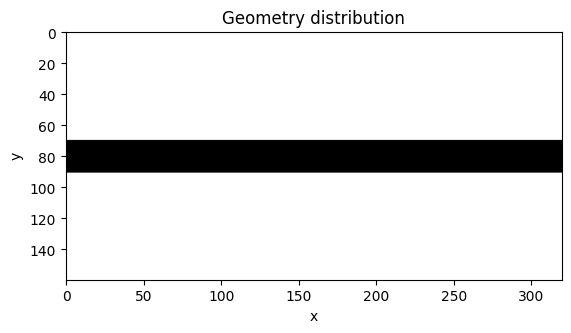

In [233]:
# Visualize permittivity distribution
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np.transpose(sim.eps_r), cmap='binary')
plt.title('Geometry distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Simulate

In [244]:
for i in range(1, sim.time_steps):
    sim.simulation_step(i)
    sim.record_detectors(sim.h_field[:,:,2])

### Visualize fields

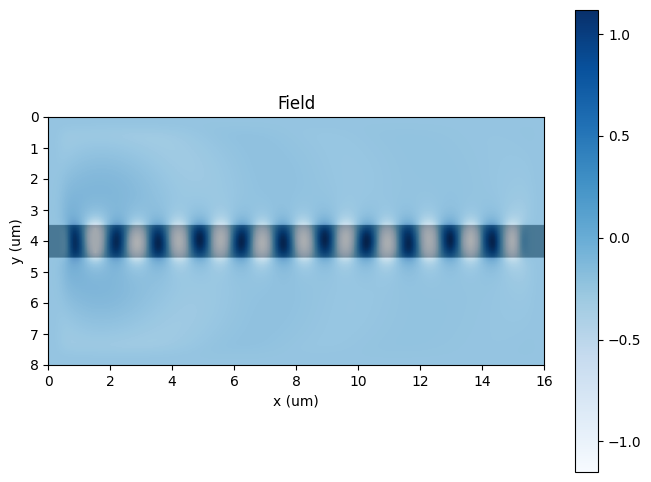

In [245]:
viz2D(sim, sim.e_field[:,:,2])

### Visualize detector

In [246]:
plt.plot(point_detector.recorded_values)

NameError: name 'point_detector' is not defined

In [10]:
!pip install vtk

In [67]:
import numpy as np
import vtk
from vtk.util import numpy_support

tm_sim.nx, tm_sim.ny = tm_sim.Dz.shape

# Convert the numpy arrays to vtkImageData
energy_data = numpy_support.numpy_to_vtk(tm_sim.Dz.ravel(), deep=True, array_type=vtk.VTK_FLOAT)
geometry_data = numpy_support.numpy_to_vtk(tm_sim.gaz.ravel(), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)

energy_image = vtk.vtkImageData()
energy_image.SetDimensions(tm_sim.nx, tm_sim.ny, 1)
energy_image.GetPointData().SetScalars(energy_data)

# geometry_image = vtk.vtkImageData()
# geometry_image.SetDimensions(tm_sim.nx, tm_sim.ny, 1)
# geometry_image.GetPointData().SetScalars(geometry_data)

# Create actors for energy and geometry data
energy_mapper = vtk.vtkDataSetMapper()
energy_mapper.SetInputData(energy_image)
energy_actor = vtk.vtkActor()
energy_actor.SetMapper(energy_mapper)

# geometry_mapper = vtk.vtkDataSetMapper()
# geometry_mapper.SetInputData(geometry_image)
# geometry_actor = vtk.vtkActor()
# geometry_actor.SetMapper(geometry_mapper)

# Set up the renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(energy_actor)
# renderer.AddActor(geometry_actor)
renderer.SetBackground(0.2, 0.2, 0.2)

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetSize(800, 800)

# Set up the interactor and start the visualization
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(render_window)
interactor.Initialize()
interactor.Start()